In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Bézier Curves
## Notebook by Alex Tsvetanov

This is a project made for an exam that's solving 2 problems that I have encountered during my journey of learning the concept and behavior of the Bézier curves. I preferred to go in depth with the code that I wrote but with a simple and not so academical explanation to some concepts that i struggled at first. That being said, the target audiece is considered to be at a beginner stage into math. Enjoy the read!

### Contents:
1. [What is a Bézier Curve?](#1.-What-is-a-Bézier-Curve?)
2. [Basic explanation of how it works](#2.-Basic-explanation-of-how-it-works)
3. [The problems](#3.-The-problems)
	1. Problem 1: A way to make it recursive
	2. Problem 2: A way to evenly distribute the t values defining the curve
4. [Problem 1](#Problem-1:-A-way-to-make-it-recursive)
	1. Introduction
	2. Solution
5. [Problem 2](#Problem-2:-A-way-to-evenly-distribute-the-points-defining-the-curve)
	1. Introduction
	2. Solution
6. [Performance testing](#Performance-testing)
7. [Playing around](#Playing-around)
8. [Final thoughts](#Final-thoughts)

### 1. What is a Bézier Curve?
If you ever did something with Adobe Photoshop, Illustrator or even played video games you probably have encountered those beautiful curves. That's because they are used mainly in computer graphics and are "expressed" in a mathematical way. An interesting fact is that the Bézier Curve was named after the French engineer Pierre Bézier, who actually popularized it but did not invent it. The curve was invented by Paul de Casteljau. Pierre used them for defining curves for the design of Renault cars. Sure, if you check some retro models of Renault you will see how cool those cars were. I wonder if the design trend will ever be back. Anyways, he developed the notation, consisting of nodes with attached control handles defining the shape of the curve. We will see and understand them later! That's important because we can approximate a real-world shape that otherwise has no mathematical representation or it will be too complicated to write down mathematically. Cool thing is that we don't really need an explanation of "what it is" because it's pretty visual and pleasing for the eye but the "scary" and powerful thing hides under the hood (not talking about cars...).
Let's dive into it!

### 2. Basic explanation of how it works
Imagine that we have a straight line. That's it... It's boring and we need to make it a bit more interesting. Let's introduce the control points! With them, we can make our boring straight line more curvy. If we have 2 control points $P1$ and $P2$, there will be no curve at all but if we add more... well we can still have a straight line if all the points are on the same axis. Take a look at this example:


<img src="img/AnimationLinear.gif" style="max-height: 300px" alt="Linear bezier" />

We can see that there is an unknown "t" variable which as we increase or decrease, moves some control points with it. This is a linear interpolation. We can understand it better if we move the control points a bit:


<img src="img/AnimationCurveTo0Point5.gif" style="max-height: 350px" alt="Bezier changing t value" />

Wow! A curve? More lines? Hold on, let's analyze that. We have:

- a $\normalsize t$ value that always has a range from 0 to 1
- the "main" lines that connect the control points $P1$, $P2$, $P3$, $P4$
- points that land on the lines connecting the control points $P5$, $P6$, $P7$, $P8$, $P9$
- dotted lines that connect the points $P5$, $P6$, $P7$, $P8$, $P9$
- a point $BZ$ which lands between $P8$ and $P9$

$P5$, $P6$, $P7$, $P8$, $P9$ are linearly interpolated points. Their position on the main lines depends on the $\normalsize t$ value. Imagine it that way: when $\normalsize t$ is 0, that's the beginning of the line. If we change it to 0.25 it will mean that the interpolated point will be moved by 25% from the beginning. If $\normalsize t$ is 1 - we are at the end. We can see that the behavior is the same for every line we define. Everything is repeated or in other words - it's recursive. That's the first thing that caught my eye, actually.

If we look closely we can see the final point $BZ$. Somehow, it always lands on the curve. That's because it is the one drawing it. Following that logic we can come to the conclusion that more $\normalsize t$ values generated means more bezier points and therefore a better curve.

Now we have a basic understanding of how the curve is generated. You can play with the curve at GeoGebra using [this](https://www.geogebra.org/m/WPHQ9rUt) project from the unknown user "user17128" for example.

Let's clarify how to interpolate a point within a line. We can use this formula:

$$ B(t)=P_0+t(P_1-P_0)=(1-t)P_0+tP_1$$
$$0\leq{t}\leq1$$

It accepts only two points because it is a linear formula. It's pretty simple and there is nothing to worry about. If we have 3 control points we can use the formula for a quadratic bezier or if the points are 4 - the cubic bezier. Take a look at the [Wikipedia](https://en.wikipedia.org/wiki/B%C3%A9zier_curve#Specific_cases) page. 

Cool, but I wanted to create a function which can accept $n$ points and render a curve so I can experiment easier with it.

### 3. The problems
As I was looking at the different ways to calculate a Bézier curve I have encountered the recursive formula which immediately grabbed my attention. After I played a bit with the basic linear formula that we just saw, I had the idea of executing it multiple times with all control points until I find the last bezier point $BZ$. Once I have this function I can use it in many different ways to plot a curve of my choise. That's perfect!

Along this journey I found out that there is a problem with the bezier points that I render on the coordinate system. They were not positioned at an equal distance even if the incrementation of the $\normalsize t$ value was equal each time. I needed to fix that.

#### Problem 1: A way to make it recursive

So, I already defined the first problem. I wanted to use the linear formula and execute it until I have only 2 control points left which after applying the formula for the last time will give me the bezier point. It may sound a bit difficult at first so I created a flowchart which shows... well... the flow of the operation. I'm a visual learner so I hope that helps you too:  


<img src="img/bezier_point_recursive.png" style="max-height: 550px" alt="Recursive function diagram" />

In the diagram we pass the following input parameters:
- $\normalsize t$ with value 0.75
- 4 control points ([2, 0], [12, 4], [0, 8], [4, 3]) which make a cubic bezier

Let's follow along. The first time we execute ``bezier_point_recursive(points, t)`` it will return 3 new control points (follow the blue path). After that we check if the point is one because if it is, it will be our bezier point and the recursion should be terminated. In the first case it's not, so it invokes itself again. We go through the red path which also returns false at the check and voilà - the green output is our $BZ$ point. This is the case when $\normalsize t$ equals 0.75. Imagine that we execute this function with $\dfrac{1}{n - 1}$ values where $n$ is the number of points that we want to render and form a curve. Deviding 1 because $0\leq{t}\leq1$. For example let's say that we want 5 bezier points. Calculating the incremental value $\dfrac{1}{5 - 1}$ is 0.25. Accumulate exactly $n - 1$ times starting from 0 and the $\normalsize t$ values will be 0, 0.25, 0.50, 0.75, 1.
Now we have enough information. Let's see the solution.

##### Solution

We'll begin with a basic function which calculates a linear Bézier. One thing to mention before we proceed is that I chose the numpy array over python lists because the whole process of rendering a "pretty" curve will be computationally heavy and it will become even heavier in the second problem that we'll solve. Stick around and you will find out why ;). Back to the function - it will accept 2 control points and a t value. Using numpy it should look like this:

In [3]:
def calc_linear_bezier(p0, p1, t):
    """
    Calculates a linear bezier point parameterized by t by using the linear formula.
    Arguments:
        p0, p1: control point. Numpy array or list with coordinates in format [x, y]
        t: "t" value. Integer between 0 and 1 inclusive
    Returns:
        The coordinates of the calculated bezier point in format [x, y] and of numpy array type.
    """
    return np.dot(1-t, p0) + np.dot(t, p1)

Nothing shiny here but It's an essential. Compare it with the mathematical representation of the formula. We will be using it in our recursive function. Speaking of the devil, let's see how `bezier_point_recursive(points, t)` looks.

In [4]:
def bezier_point_recursive(points, t):
    """
    Calculates a bezier point parameterized by t with a given set of control points.
    Arguments:
        points: control points. A numpy array with coordinates in format [x, y]
        t: "t" value. Integer between 0 and 1 inclusive
    Returns:
        The coordinates of the calculated bezier point in format [x, y] and of numpy array type.
    """
    new_points = np.empty([len(points) - 1, 2])
    
    for i in range(len(points) - 1):
        point = calc_linear_bezier(points[i], points[i + 1], t)
        new_points[i] = point
    
    if len(new_points) == 1:
        return new_points[0]
    
    return bezier_point_recursive(new_points, t)

First, we define the array `new_points`. Every point that is returned by `calc_linear_bezier` is added to this array with predefined space. You can see that we iterate `len(points) - 1`. That's because we look one step forward each time to get a pair of 2 control points. After the loop is done, we perform the check (known from the diagram) and decide if we are at the end and this is the $BZ$ point. That's it. Not so hard after all. Now let's check if it works. We can proof that with the cubic Bézier formula. It looks like this:

$$ B(t)=(1-t)^3P_0+3(1-t)^2tP_1+3(1-t)t^2P_2+t^3P_3$$

And made as a python function it looks unpleasant but I made it just for proofing so It's acceptable:

In [5]:
def calc_cubic_bezier(p0, p1, p2, p3, t):
    """
    Calculates a cubic bezier point parameterized by t by using the cubic Bezier formula.
    Arguments:
        p0, p1, p2, p3: control point. Numpy array or list with coordinates in format [x, y]
        t: "t" value. Integer between 0 and 1 inclusive
    Returns:
        The coordinates of the calculated bezier point in format [x, y] and of numpy array type.
    """
    u = 1 - t
    return np.dot(pow(u, 3), p0) + np.dot(3 * pow(u, 2) * t, p1) + np.dot(3 * u * pow(t, 2), p2) + np.dot(pow(t, 3), p3)

Let's calculate the points from our diagram with $t=0.75$

In [6]:
points = np.array([[2,0],[12,4],[0,8],[4,3]])
result_recursive = bezier_point_recursive(points, 0.75)
result_formula = calc_cubic_bezier(points[0], points[1], points[2], points[3], 0.75)

np.testing.assert_array_equal(result_recursive, result_formula)

As you can see, the results are the same and we can proceed with our next function which will generate the $\normalsize t$ values and pass them to the recursive function. I've already mentioned that the $\normalsize t$ values will be $\dfrac{1}{n - 1}$ so we'll have the freedom to generate as many $\normalsize t$ values as we like. Here is what I'm talking about:

In [7]:
def bezier_curve_equal_t_points(c_points, n):
    """
    Produces "n" bezier points by generating and evenly distributing "t" values. 
    Arguments:
        c_points: control points. Numpy array with coordinates in format [x, y]
        n: the total number of points to generate. An integer
    Returns:
        A numpy array with the coordinates of the calculated bezier points.
    """
    t_incr = 1 / (n - 1)
    t = 0
    bz_points = np.empty([n, 2])
    for i in range(n):
        interpolated_point = bezier_point_recursive(c_points, t)
        bz_points[i] = interpolated_point
        t += t_incr
    return bz_points

Notice how it loops $n$ times and invokes the recursive function, each time passing the same control points and an incremented $\normalsize t$. Then it stores the $BZ$ points to the `bz_points` array. Let's generate 5 $BZ$ points!

In [8]:
bezier_curve_equal_t_points(points, 5)

array([[2.      , 0.      ],
       [5.96875 , 2.859375],
       [5.25    , 4.875   ],
       [3.40625 , 5.203125],
       [4.      , 3.      ]])

That's it! We have the points of the curve. This means that we can plot it. I've created this simple plot function which takes the control points and our fresh new $BZ$ points. It has the input parameter `cp_lines` which allows us to hide the control points and the lines connecting them, leaving only the curve. There are a couple more parameters which we will not use, except in the section "Playing around".

In [9]:
def plot_bezier_coordinates(control_points, bz_points, cp_lines = True, xlim = None, ylim = None, equal_aspect = False, title = None):
    """
    Plots a Bezier curve points and optionally the control points with the connecting lines.
    Arguments:
        c_points: control points. Numpy array with coordinates in format [x, y]
        bz_points: bezier points. Numpy array with coordinates in format [x, y]
        cp_lines: boolean defining if the control points will be rendered. A boolean with default value - True
        xlim: defines the x limits. Numpy array with coordinates in format [left, right]
        ylim: defines the y limits. Numpy array with coordinates in format [left, right]
        equal_aspect: boolean defining if the aspect ratio should be equal for x and y. A boolean with default value - False
        title: string setting the title of the plot. Defaults to None
    """
    x_bz = bz_points[:,0]
    y_bz = bz_points[:,1]
    plt.scatter(x_bz, y_bz, label="bz point")
    
    if cp_lines:
        x_control_point = control_points[:,0]
        y_control_point = control_points[:,1]
        plt.scatter(x_control_point, y_control_point, color="red", label="control point")
        plt.plot(x_control_point, y_control_point, linestyle="--", markersize=7, color="red")
    
    if xlim != None:
        plt.xlim(xlim[0], xlim[1])

    if ylim != None:
        plt.ylim(ylim[0], ylim[1])
        
    if title != None:
        plt.title(title)

    if equal_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()

Let's try it out with some more $BZ$ points.

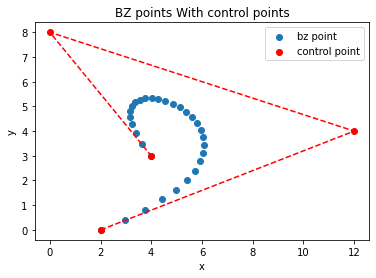

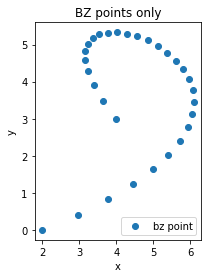

In [10]:
bz_points = bezier_curve_equal_t_points(points, 30)
plot_bezier_coordinates(points, bz_points, title="BZ points With control points")
plot_bezier_coordinates(points, bz_points, cp_lines=False, equal_aspect=True, title="BZ points only")

Now we finally see what it's all about. We've successfully rendered a bezier curve and that's super satisfying but one thing keeps bothering me. Look how the dots are not equally spaced. Even though we pass an equally spaced $\normalsize t$ values the points are not interpolated right. That's because we parameterize by $\normalsize t$ and not by the arc length of the curve. Knowing the arc length will do us a favor because we can devide the curve in terms of a distance. Not spacing the dots equally is not only annoying but it's actually stopping the bezier curves to be useful. This is our second problem.

#### Problem 2: A way to evenly distribute the points defining the curve

If we are only drawing the line of the curve It's all fine. We don't bother much about the spacing rather then the granularity. Why? Because we want a nice non-edgy curve and the solution is easy - just generate more dots. But if you wonder why we would ever need them equally spaced I have an example for you. Actually there is an interesting article about this example and [here](http://www.planetclegg.com/projects/WarpingTextToSplines.html) it is. Everybody knows Microsoft Powerpoint and It's fancy features, one of them being able to make a graffiti-like texts with the provided templates. In this case we have a curve above which the words are placed. Guess how they are spaced, hehe. Look at the pictures from the article and notice how the alphabets shrink on the left picture:

<table><tr>
<td> <img src="img/BeforeArcLengthParam.png" style="max-height: 300px" alt="Bezier changing t value" /> </td>
<td> <img src="img/AfterArcLengthParam.png" style="max-height: 300px" alt="Bezier changing t value" /> </td>
</tr></table>

Unfortunately there isn't an easy solution for the so-called "Arc Length Parameterization" or at least I haven't found one. So I tried to understand the method of Freya Holmer in her stunning video [The Beauty of Bézier Curves](https://www.youtube.com/watch?v=aVwxzDHniEw) and started coding around the concept. But because it's more like an overview on the subject, it required a lot of additional digging and experimenting on my side. 

First, I tried to create the [Lookup table](https://en.wikipedia.org/wiki/Lookup_table) (LUT). If you wonder what it is - it's simply an array created in the runtime (although not always but in our case - yes) and organized in a way that obtaining a certain value is possible by passing a key. In our case the key would be a distance and the value would be the $\normalsize t$. When we pass our "new" $\normalsize t$ value to the recursive function, the bezier point will be rendered at the desired distance. One thing is very important - how rich is our LUT in terms of stored mapped distances? Well, the function that I made is dynamic and we can choose how much. On one side the computation will be heavy and on the other - light but not so precise.

Now, how to create it? The function generating the LUT is using the recursive function. It executes it $n$ times and each time it increases the $\normalsize t$ value slightly. After obtaining a pair or $BZ$ points it uses the [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) to take only the hypotenuse of the formed triangle using the pythagorean theorem. Sounds a bit complicated but it really isn't. Take a look at this animation from Wiki and my notation on the right:

<table><tr>
<td> <img src="img/TrapezoidalRule.gif" style="max-height: 300px" alt="Bezier changing t value" /> </td>
<td> <img src="img/TrapezoidalRuleArcLen.png" style="max-height: 300px" alt="Bezier changing t value" /> </td>
</tr></table>

##### Solution

To get the hypotenuse we need the other 2 sides of the triangle. $dx$ is the distance between the $x$ coordinates of the current two $BZ$ points and $dy$ is the distance between the $y$ coordinates. To get the values we will need a seperate function because there a 3 different cases for calculation:
- both input values are positive
- both input values are negative
- one is negative, the other is positive

The function `calc_dist_between(x1, x2)` determines how to calculate this distance.

In [11]:
def calc_dist_between(x1, x2):
    """
    Calculates the distance between two numbers - x1 and x2.
    Arguments:
        x1: an integer
        x2: an integer
    Returns:
        An integer indicating the distance between x1 and x2.
    """
    x1_abs = abs(x1)
    x2_abs = abs(x2)

    if (x1 < 0 and x2 > 0) or (x2 < 0 and x1 > 0):
        return x1_abs + x2_abs

    if x1_abs > x2_abs:
        return x1_abs - x2_abs

    return x2_abs - x1_abs

In [12]:
# some tests to ensure correctness.
assert calc_dist_between(-7, -5) == 2
assert calc_dist_between(-5, -7) == 2
assert calc_dist_between(-3, 7) == 10
assert calc_dist_between(7, -3) == 10
assert calc_dist_between(0, 5) == 5
assert calc_dist_between(5, 0) == 5
assert calc_dist_between(-5, 0) == 5
assert calc_dist_between(0, -5) == 5

Once we have it, we can proceed with the next function responsible for generating the LUT.

In [13]:
def get_lut(c_points, lut_size):
    """
    Generates an array of pairs (or so-called LUT). Each pair consists of a distance and a "t" value.
    Arguments:
        c_points: control points. Numpy array with coordinates in format [x, y]
        lut_size: the total number of pairs to generate. An integer
    Returns:
        The LUT with the desired size. A numpy array.
    """
    arc_lengths = range(1, lut_size)
    
    multiplier = 1 / (lut_size - 1) # since the max t value is 1 devide it by the points to get the multiplier
    
    lut = np.empty([lut_size, 2])
    lut[0] = [0, 0]
    
    curr_curve_len = 0

    f = bezier_point_recursive(c_points, 0)
    for i in arc_lengths:
        t_next = i * multiplier
        f_next = bezier_point_recursive(c_points, t_next)
        
        dx = calc_dist_between(f[0], f_next[0])
        dy = calc_dist_between(f[1], f_next[1])
        hypotenuse_len = np.sqrt(dx * dx + dy * dy) # pythagorean theorem
        
        curr_curve_len += hypotenuse_len
        lut[i] = [curr_curve_len, t_next]
        f = f_next
    
    return lut

In [14]:
# a quick check to ensure that the methods generates the correct count of records.
lut_size = 5
assert len(get_lut(points, lut_size)) == lut_size

As you can see, it accepts the control points of the curve and the size of the LUT. I already mentioned that by choosing size we sacrafice precision or performance. The `arc_lengths` is a sequence of numbers starting from 1. It is used by the loop and starts from 1 because we need the `i` value to generate the `t_next`. More for this variable in a bit. First take a look at `multiplier`. It is created by deviding 1 with the size of our table minus 1. It's best to understand it with examples.

If we have a LUT with size of 5, our multiplier will be 0.25. We'll multiply the `i` variable each iteratation of the loop. This means that `t_next` will have a total of $5-1=4$ values. We subtract 1 because the first value is already inserted before the loop like `lut[0] = [0, 0]`. So the first calculation in the following example is for clarity and it is not actually done:
$$0\cdot0.25 = 0$$
$$1\cdot0.25 = 0.25$$
$$2\cdot0.25 = 0.50$$
$$3\cdot0.25 = 0.75$$
$$4\cdot0.25 = 1$$
Notice how the values are always between 0 and 1. They are also evenly spaced. This reminds us of our `bezier_curve_equal_t_points` because it's doing mostly the same thing. Also, if we have a bigger LUT size the difference between the values will be smaller and therefore the precision will be better. You will get a hang of it once we execute it. 

`f` and `f_next` are the coordinates returned by our recursive function. The first time we generate a point with a given $\normalsize t$ and then we use the multiplier to generate a second one $\normalsize t$ with a slight difference. That's why we have two function result variables. Once the points are 2 we can calculate the difference between them. Here goes the `calc_dist_between` I already talked about. As you can see, it's calculating $dx$ and $dy$. Then the values are used in a pythagorean theorem to get the hypotenuse. If you are lost just look at the last pictures above and try to figure it out visually. Finally, we add a new pair of values to `lut` in a way that the key is a distance and the value is $\normalsize t$

Lets try the function by generating a LUT with a size of 5. We'll render the curves in 

In [15]:
def lut_to_dataframe(lut):
    frame = pd.DataFrame(data=lut) # using Pandas to get a better visuals for our LUT data.
    frame.columns = ["distance", "t"]
    frame.index += 1
    return frame

lut = get_lut(points, 5)
lut_frame = lut_to_dataframe(lut)
lut_frame

,distance,t
1,0.000000,0.00
2,4.891523,0.25
3,7.031464,0.50
4,8.904184,0.75
5,11.185916,1.00


An important thing to note here is that the last pair holds the total length of the curve. Well, an approximation of it because if we have more pairs it will be more accurate (but not always, just wait for the examples :) ). We'll use that information in our next function. It's called `distance_to_t` and it does what it says, thankfully. It's a mapper and accepts a desired distance, goes through the LUT and finds the $\normalsize t$ with a paired distance closest to our desired one.

In [16]:
def distance_to_t(dist, lut):
    """
    Iterates through the provided LUT and finds the pair with the closest distance to the input.
    Arguments:
        dist: The desired distance that the returned "t" will represent. A float
        lut: The LUT that it will use to extract the "t" value. A numpy array
    Returns:
        An integer "t" value within the range of 0 and 1 inclusive.
    """
    n = len(lut) - 1
    arc_len = lut[len(lut) - 1][0]
    if (dist > arc_len): return 0
    
    for i in range(n):
        prev_dist = lut[i][0]
        next_dist = lut[i + 1][0]
        # if the distance is between the current 2 distances from the lut, return the closest distance t value
        if (dist >= prev_dist and dist <= next_dist):
            # figure out which one is closer
            close_to_prev = dist - prev_dist
            close_to_next = next_dist - dist
            if (close_to_prev <= close_to_next):
                return lut[i][1]
            else:
                return lut[i + 1][1]

The logic is a bit repetitive as in the other functions. We see a loop that iterates `n` times. There is an `arc_len` which is the total length of the curve. We use it to check if the passed distance is in the range of our curve. In the loop we always get a pair of 2 LUT records (perhaps a pair of pairs?). It's doing it because it checks if the distance is between them. If it isn't, just continues to the next pair. But if it does, then one more check is performed - which pair distance is closer to the desired one? Once it finds that out - we are done. The desired $\normalsize t$ is found and by using it we will get a point with a distance close to the one we want. 

Let's see some examples with a low and high precision. First, we are going to use the LUT from the first table that we created with only 5 records:

In [17]:
lut_frame

,distance,t
1,0.000000,0.00
2,4.891523,0.25
3,7.031464,0.50
4,8.904184,0.75
5,11.185916,1.00


In [18]:
mapped_t = distance_to_t(6, lut)
print('mapped t to distance 6 is ' + str(mapped_t))
mapped_t = distance_to_t(7, lut)
print('mapped t to distance 7 is ' + str(mapped_t))

mapped t to distance 6 is 0.5
mapped t to distance 7 is 0.5


When we want a $\normalsize t$ representing a distance of 7, this LUT is doing a perfect job because the recorded closest distance is 7.03 which is pretty close. However, if we want a $\normalsize t$ representing a distance of 6 the things get uglier. The returned $\normalsize t$ value is the same because it's also the closest. This is the tricky part. Depending on the  values that we want, the size of the LUT should be carefully selected. I wonder how It can be automated (if possible) to determine the golden size? Let's see what is going on with a LUT of 30 records:

In [19]:
lut = get_lut(points, 30)
lut_to_dataframe(lut)

,distance,t
1,0.000000,0.000000
2,1.042999,0.034483
3,1.951360,0.068966
4,2.736629,0.103448
5,3.410964,0.137931
6,3.987350,0.172414
7,4.479830,0.206897
8,4.903672,0.241379
9,5.275227,0.275862
10,5.611152,0.310345


In [20]:
mapped_t = distance_to_t(6, lut)
print('mapped t to distance 6 is ' + str(mapped_t))
mapped_t = distance_to_t(7, lut)
print('mapped t to distance 7 is ' + str(mapped_t))

mapped t to distance 6 is 0.3448275862068966
mapped t to distance 7 is 0.4482758620689655


Sorry for the huge table output but it's important to see the values. Now the closest recorded distance to 7 was 7.17 and to 6 - 5.93. There is an overall better accuracy but the point that I'm trying to make is that for some distances a smaller LUT would actually be better. If the total length is important for some reason, we'll need the bigger table because there it is more accurate. If you want to see what's the performance of this function with a huge size, you can go to the [next section](#Performance-testing). You are probably thinking: "C'mon dude, it's getting too much... so many things just to evenly space the points and it's still not completely working?" and yes, you have every right to think so... BUT WAIT! Just one more function and that's it. There will be visuals, I promise.

This last function uses almost all previous functions that we defined.

In [21]:
def bezier_curve_equal_dist_points(c_points, number_bz_points, lut_size):
    """
    Produces "n" bezier points by generating and evenly distributing distance values. 
    Then converts the distance values to "t" values by using a LUT. 
    That way an arc length parameterization is accomplished.
    Arguments:
        c_points: control points. Numpy array with coordinates in format [x, y]
        number_bz_points: the total number of points to generate. An integer
        lut_size: the size (or precision) of the LUT that's going to be used. An integer
    Returns:
        A numpy array with the coordinates of the calculated bezier points.
    """
    lut = get_lut(c_points, lut_size)
    arc_length = lut[len(lut)-1][0]
    multiplier = arc_length / (number_bz_points - 1)
    bz_points = np.empty([number_bz_points, 2])

    for i in range(number_bz_points):
        dist = i * multiplier
        t = distance_to_t(dist, lut)
        interpolated_point = bezier_point_recursive(c_points, t)
        bz_points[i] = interpolated_point

    return bz_points

First, we generate the LUT by passing `lut_precision` which will be the size of the table. The `arc_length` is the total length of the curve. We define `multiplier` the same way we did in the `get_lut` function and the explanation is the same. After that we use it in the loop to generate the `dist` variable. The `dist` on the other hand is passed to our mapper function to get the $\normalsize t$. Finally it is passed to the recursive function to calculate the $BZ$ point which is then stored in `bz_points`. See how everything comes together. It still annoys me that the recursive function is rendered too many times. We'll talk about optimization at the end. First, let's just see this curve plotted, right?

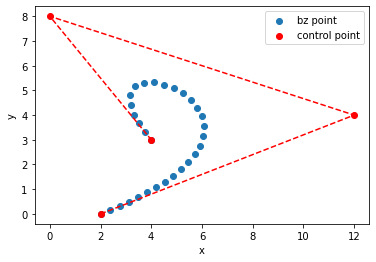

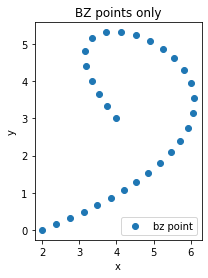

In [22]:
bz_points = bezier_curve_equal_dist_points(points, 30, 2000)
plot_bezier_coordinates(points, bz_points)
plot_bezier_coordinates(points, bz_points, cp_lines=False, equal_aspect=True, title="BZ points only")

Now that's what I was looking for! I suggest you don't stare at it too much because it's still not perfect, even when we have 2000 generated points to choose from. That's the sad reality. With the current precision the coordinates are usable for something like moving an object with relatively the same speed. Let's see an example with 10 points but with different precision.

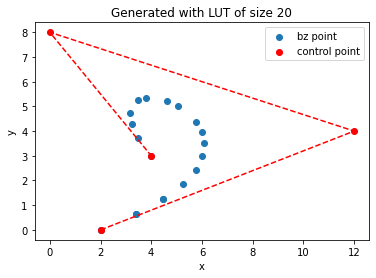

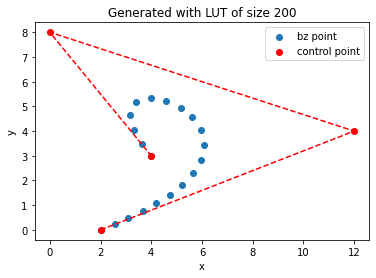

In [23]:
bz_points = bezier_curve_equal_dist_points(points, 20, 20)
plot_bezier_coordinates(points, bz_points, title="Generated with LUT of size 20")
bz_points = bezier_curve_equal_dist_points(points, 20, 200) # LUT with size of 200
plot_bezier_coordinates(points, bz_points, title="Generated with LUT of size 200")

When we find a pair of distances in the LUT we choose the one with the closest distance to our input distance. That's generally a good idea but when the precision is low it can cause some disturbance. You can see what I mean in the first picture above. Maybe it would have been a better idea to render the other coordinate from the pair but that's the downside of this approach.

#### Performance testing

The most interesting thing to measure is of course our LUT generating function. We can test how much time it takes to generate a table with around 5000 records for a Bézier curve with 10 control points. Then we will see how much time it added by the function using it to render the points equally spaced. It should be interesting. Let's go!

In [24]:
points = np.array([[0,0],[-2,8],[8,-10],[18,10],[22,0],[30,12],[38,16], [24,0], [35,-5], [40, 5]])

# executing the function 10 times to average out how much time it takes
# LUT with a size of 100
%timeit get_lut(points, 100)

# LUT with a size of 5000
%timeit get_lut(points, 5000)

14.5 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
721 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As you can see the time difference is not small. The generation of a LUT with a precision of 5000 is around 700ms slower than the LUT with precision of 100. If we are going to use this function for some serious stuff, we should consider the size carefully. But how much time it takes to get the bezier points within an equal distance? We are going to measure `bezier_curve_equal_dist_points` which uses most of the functions in the project so it must be heavy, right? We can test it in several ways by requesting a bézier with only a few points but a huge LUT or the opposite. Sure, we can pass a huge numbers for everything and see how it behaves like that as well.

In [25]:
print("Huge LUT but a bézier curve with small number of points:")
%timeit bezier_curve_equal_dist_points(points, 20, 5000)

print("Small LUT but a bézier curve with many points:")
%timeit bezier_curve_equal_dist_points(points, 1000, 100) # that's actually pointless in practice

print("Huge LUT and a bézier curve with many points:")
%timeit bezier_curve_equal_dist_points(points, 1000, 5000)

Huge LUT but a bézier curve with small number of points:
737 ms ± 3.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Small LUT but a bézier curve with many points:
207 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Huge LUT and a bézier curve with many points:
1.82 s ± 8.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


I'm surprised! The heaviest execution with 1000 bézier points and a 5000 records table took a little bit less then 2 second. I think it's acceptable for such unoptimized function, hehe.

Let's talk about optimization for a moment. There are mostly things that can be changed in the solution for the second problem. We can get rid of our `get_lut` function or more specifically merge the logic with `bezier_curve_equal_dist_points`. We can decide whether we want to store a point coordinates directly in our result array in the proccess of generate the LUT by passing a desired distance between the points and then the function will be deciding which points to render. Because the function uses the recursive calculation we have all the data we need. That way we'll not store every value in a LUT and more memory will be saved. Also, It will be lighter because now we execute the recursive function multiple times to generate the LUT and then again, multiple times to produce the final points which is kinda noobish. In a simple words - we can reduce the execution of the recursive function. The more I think about it, more ideas pop up. Beware of the overthinking problem where you can overly complicate the code just like when you are doing an abstraction following the OOP principles. There is always something that unsettles you and you want to change it. Or is it just me?

#### Playing around

What's the point of making these things if we don't play with them a bit. However, I don't want to fill this notebook with too much plotting. Feel free to take the code and do your own curves. You can adjust the plotting function to plot multiple curves so you can later connect them and do one big curve. Here I'm generating more control points to make a curve like a rollercoaster track:

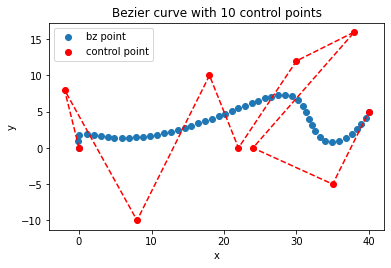

In [26]:
# using the points from the performance measurement section above
curve_equal_dist = bezier_curve_equal_dist_points(points, 50, 500)
plot_bezier_coordinates(points, curve_equal_dist, equal_aspect = True, title="Bezier curve with 10 control points")

Also, we can position the control points in a way to draw a circle:

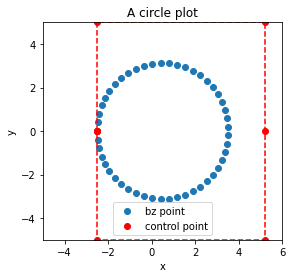

In [27]:
circle_points = np.array([[-2.5,0],[-2.5,5],[5.2,5],[5.2,0],[5.2,-5],[-2.5,-5],[-2.5,0]])
curve_equal_dist = bezier_curve_equal_dist_points(circle_points, 50, 500)
plot_bezier_coordinates(circle_points, curve_equal_dist, xlim=[-5,6], ylim=[-5,5], equal_aspect = True, title="A circle plot")

#### Final thoughts

The Bezier curves are so interesting and a lot of experimenting can be done with them. Once implemented, they can be used in a numerous ways. I honestly can't wait to optimize this implementation and use it in Unity or here in Python in combination with some cool libraries. I encourage you to do so as well. Those curves were my introduction to math and I'm happy that I found something interesting for me to explore and learn some concepts along the way. Although, there isn't any super heavy head crushing math involved in this project, it thought me a lesson. I discovered a method of learning math more easily. From now on I'll try to pick up problems that can be solved using math concept that I'm not good at and try to get used to it that way. Not trying to turn the project into a self-help/motivational read but I think it's a great advice. 
Anyways, stay curious!